In [59]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [60]:
data = fetch_olivetti_faces(random_state=42)
X = data.data
y = data.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 74.17%


In [69]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.33      0.50         3
           7       1.00      0.00      0.00         8
           8       1.00      1.00      1.00         2
           9       0.30      1.00      0.46         3
          10       1.00      0.67      0.80         3
          11       1.00      0.80      0.89         5
          12       0.25      0.50      0.33         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.50      1.00      0.67         3
          16       0.00      1.00      0.00         0
   

In [65]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


In [66]:
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')


Cross-validation accuracy: 88.25%


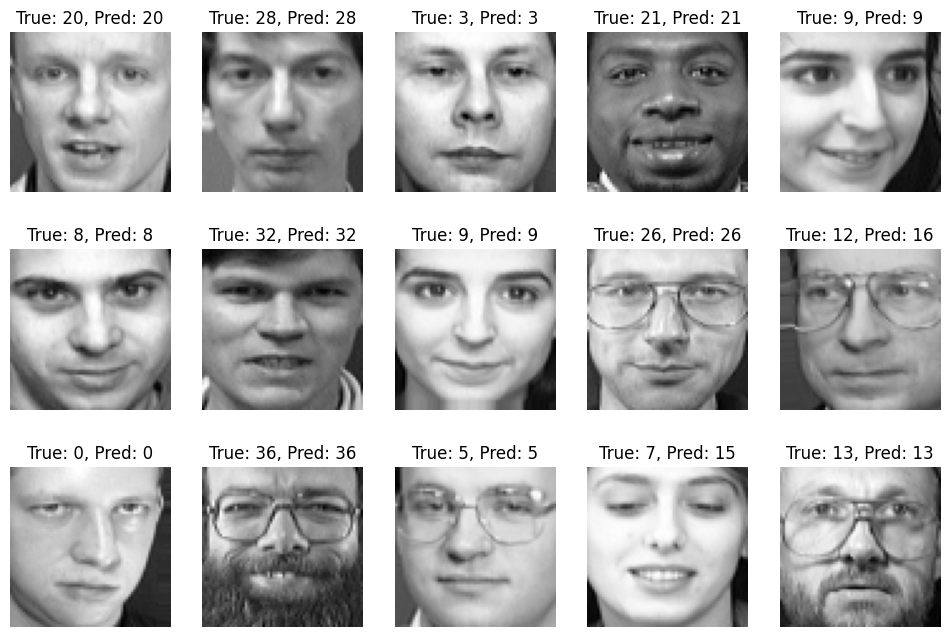

In [67]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')

plt.show()